In [64]:
# Importando biblitecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [65]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [66]:
df_dados_vendas = pd.DataFrame.from_dict(dados_vendas)

In [67]:
df_dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [68]:
df_dados_vendas.head(12)

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [69]:
# Criando uma feature que representa o numero do mês correspondente
df_dados_vendas['month_number'] = range(1,13)

In [70]:
df_dados_vendas.head(12)

,mes,vendas,month_number
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [71]:
#Modelo
x = df_dados_vendas[['month_number']]
y = df_dados_vendas.vendas

# Criando conjunto de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=51)

In [72]:
#Treinando o modelo
model = LinearRegression().fit(x_train, y_train)

In [73]:
# Gerar predições do conjunto de testes com base no modelo
y_pred = model.predict(x_test)

In [74]:
# Prevendo valor de dezembro pela equacao da reta
a = model.coef_ 
b = model.intercept_
print(f"Coeficiente: {a[0]} \nIntercepto: {b}" )
r2_score_train = model.score(x_train, y_train)
r2_score_test = model.score(x_test, y_test)
print(f"r2_score do conjunto de treino: {r2_score_train}\nr2_score do conjunto de teste: {r2_score_test}")
mean_error = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mean_error}")
dezembro = a[0] * 12 + b
print(f"Valor previsto para dezembro: {dezembro}")

Coeficiente: 114.16666666666669 
Intercepto: 1963.3333333333333
r2_score do conjunto de treino: 0.990709949854843
r2_score do conjunto de teste: 0.9631440781440782
MAE: 36.66666666666663
Valor previsto para dezembro: 3333.3333333333335


array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'month_number'}>]], dtype=object)

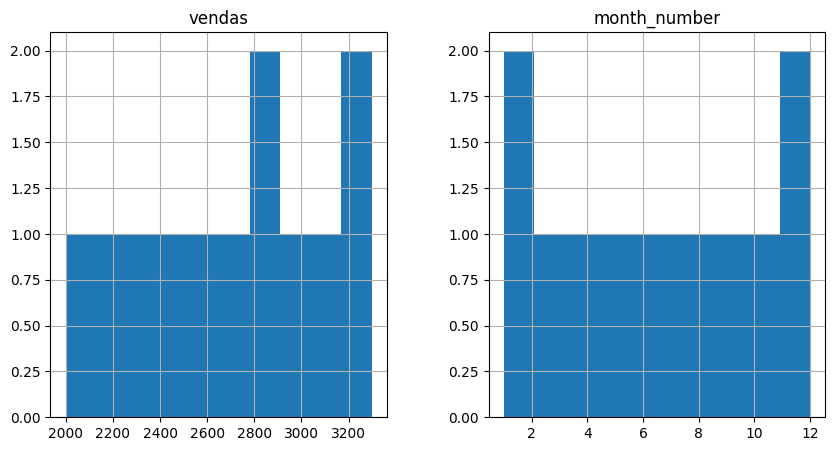

In [76]:
# Histograma dos dados
df_dados_vendas.hist(layout=(1,2), figsize=(10,5))

<Axes: xlabel='month_number', ylabel='vendas'>

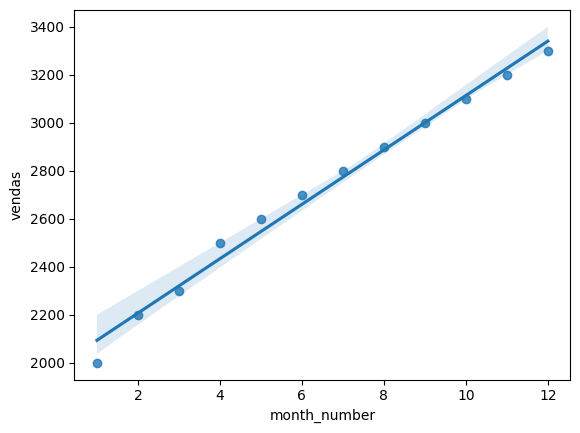

In [77]:
# Scatter 
sns.regplot(data=df_dados_vendas, x='month_number', y='vendas')